In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
import numpy as np
from pathlib import Path
import hvplot.pandas
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [5]:
df = pd.read_csv(
    Path("./data/markets_ohlcv.csv"), 
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)


C:\Users\Rania\AppData\Local\Temp\ipykernel_13344\985016237.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
C:\Users\Rania\AppData\Local\Temp\ipykernel_13344\985016237.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


In [6]:
df.head()

,open,high,low,close,volume
date,,,,,
2015-01-21 09:30:00,23.83,23.83,23.83,23.83,100
2015-01-21 11:00:00,23.98,23.98,23.98,23.98,100
2015-01-22 15:00:00,24.42,24.42,24.42,24.42,100
2015-01-22 15:15:00,24.42,24.44,24.42,24.44,200
2015-01-22 15:30:00,24.46,24.46,24.46,24.46,200


In [7]:
df.index

DatetimeIndex(['2015-01-21 09:30:00', '2015-01-21 11:00:00',
               '2015-01-22 15:00:00', '2015-01-22 15:15:00',
               '2015-01-22 15:30:00', '2015-01-26 12:30:00',
               '2015-01-26 14:15:00', '2015-01-26 14:45:00',
               '2015-01-26 15:15:00', '2015-01-27 10:00:00',
               ...
               '2021-01-14 15:45:00', '2021-01-19 09:30:00',
               '2021-01-19 11:15:00', '2021-01-19 12:30:00',
               '2021-01-20 09:45:00', '2021-01-22 09:30:00',
               '2021-01-22 11:30:00', '2021-01-22 13:45:00',
               '2021-01-22 14:30:00', '2021-01-22 15:45:00'],
              dtype='datetime64[ns]', name='date', length=4323, freq=None)

In [8]:
signals_df=df.loc[:,["close"]]
signals_df["actual returns"]=signals_df["close"].pct_change()

In [10]:
signals_df=signals_df.dropna()
display(signals_df.head())
display(signals_df.tail())

,close,actual returns
date,,
2015-01-21 11:00:00,23.98,0.006295
2015-01-22 15:00:00,24.42,0.018349
2015-01-22 15:15:00,24.44,0.000819
2015-01-22 15:30:00,24.46,0.000818
2015-01-26 12:30:00,24.33,-0.005315


,close,actual returns
date,,
2021-01-22 09:30:00,33.27,-0.006866
2021-01-22 11:30:00,33.35,0.002405
2021-01-22 13:45:00,33.42,0.002099
2021-01-22 14:30:00,33.47,0.001496
2021-01-22 15:45:00,33.44,-0.000896


Simple moving averages(4 and 100 days respictivly)

In [11]:
short_window=8
long_window=20

signals_df['SMA_fast']=signals_df['close'].rolling(window=short_window).mean()
signals_df['SMA_slow']=signals_df['close'].rolling(window=long_window).mean()

In [12]:
signals_df=signals_df.dropna()

In [13]:
display(signals_df.head())
display(signals_df.tail())

,close,actual returns,SMA_fast,SMA_slow
date,,,,
2015-01-30 13:30:00,23.75,-0.005860,24.05000,24.1500
2015-02-02 10:15:00,23.89,0.005895,24.02125,24.1455
2015-02-02 11:00:00,23.92,0.001256,23.99250,24.1205
2015-02-02 11:15:00,23.94,0.000836,23.96750,24.0955
2015-02-02 11:30:00,23.95,0.000418,23.94625,24.0700


,close,actual returns,SMA_fast,SMA_slow
date,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.02625,32.4810
2021-01-22 11:30:00,33.35,0.002405,33.10125,32.5955
2021-01-22 13:45:00,33.42,0.002099,33.19750,32.6900
2021-01-22 14:30:00,33.47,0.001496,33.27500,32.7880
2021-01-22 15:45:00,33.44,-0.000896,33.31125,32.8785


- if actual returns >=0 ==> buy stock long 
- if actual return <0==> sell stock short

In [14]:
signals_df['Signal']=0.0
signals_df.loc[(signals_df['actual returns']>=0),'Signal']=1
signals_df.loc[(signals_df['actual returns']<0),'Signal']=-1

display(signals_df.head())
display(signals_df.tail())

,close,actual returns,SMA_fast,SMA_slow,Signal
date,,,,,
2015-01-30 13:30:00,23.75,-0.005860,24.05000,24.1500,-1.0
2015-02-02 10:15:00,23.89,0.005895,24.02125,24.1455,1.0
2015-02-02 11:00:00,23.92,0.001256,23.99250,24.1205,1.0
2015-02-02 11:15:00,23.94,0.000836,23.96750,24.0955,1.0
2015-02-02 11:30:00,23.95,0.000418,23.94625,24.0700,1.0


,close,actual returns,SMA_fast,SMA_slow,Signal
date,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.02625,32.4810,-1.0
2021-01-22 11:30:00,33.35,0.002405,33.10125,32.5955,1.0
2021-01-22 13:45:00,33.42,0.002099,33.19750,32.6900,1.0
2021-01-22 14:30:00,33.47,0.001496,33.27500,32.7880,1.0
2021-01-22 15:45:00,33.44,-0.000896,33.31125,32.8785,-1.0


In [15]:
signals_df['Signal'].value_counts()

Signal
 1.0    2422
-1.0    1881
Name: count, dtype: int64

strategy return 

In [16]:
signals_df['strategy_return']=signals_df['actual returns']*signals_df['Signal'].shift()
display(signals_df.head())
display(signals_df.tail())

,close,actual returns,SMA_fast,SMA_slow,Signal,strategy_return
date,,,,,,
2015-01-30 13:30:00,23.75,-0.005860,24.05000,24.1500,-1.0,NaN
2015-02-02 10:15:00,23.89,0.005895,24.02125,24.1455,1.0,-0.005895
2015-02-02 11:00:00,23.92,0.001256,23.99250,24.1205,1.0,0.001256
2015-02-02 11:15:00,23.94,0.000836,23.96750,24.0955,1.0,0.000836
2015-02-02 11:30:00,23.95,0.000418,23.94625,24.0700,1.0,0.000418


,close,actual returns,SMA_fast,SMA_slow,Signal,strategy_return
date,,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.02625,32.4810,-1.0,-0.006866
2021-01-22 11:30:00,33.35,0.002405,33.10125,32.5955,1.0,-0.002405
2021-01-22 13:45:00,33.42,0.002099,33.19750,32.6900,1.0,0.002099
2021-01-22 14:30:00,33.47,0.001496,33.27500,32.7880,1.0,0.001496
2021-01-22 15:45:00,33.44,-0.000896,33.31125,32.8785,-1.0,-0.000896


<Axes: xlabel='date'>

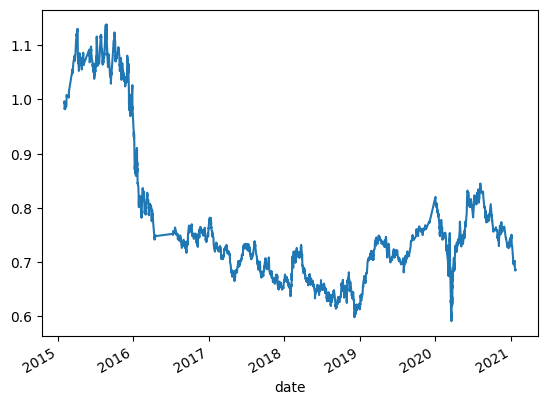

In [17]:
(1+signals_df['strategy_return']).cumprod().plot()

In [18]:
x=signals_df[['SMA_fast','SMA_slow']].shift().dropna()
x.head()

,SMA_fast,SMA_slow
date,,
2015-02-02 10:15:00,24.05000,24.1500
2015-02-02 11:00:00,24.02125,24.1455
2015-02-02 11:15:00,23.99250,24.1205
2015-02-02 11:30:00,23.96750,24.0955
2015-02-02 13:30:00,23.94625,24.0700


In [19]:
y=signals_df['Signal']
y.value_counts()

Signal
 1.0    2422
-1.0    1881
Name: count, dtype: int64

In [20]:
train_begin=x.index.min()
print(train_begin)

2015-02-02 10:15:00


In [21]:
train_end=x.index.min()+DateOffset(months=6)
print(train_end)

2015-08-02 10:15:00


In [27]:
x_train = x.loc[train_begin:train_end]
y_train = y.loc[train_begin:train_end]

In [24]:
x_test=x.loc[train_end+DateOffset(hours=1):]
y_test=y.loc[train_end+DateOffset(hours=1):]


In [25]:
x_test.head()

,SMA_fast,SMA_slow
date,,
2015-08-03 09:30:00,22.76750,22.8945
2015-08-03 10:15:00,22.77125,22.8440
2015-08-03 10:30:00,22.77125,22.7955
2015-08-03 10:45:00,22.76625,22.7510
2015-08-03 11:00:00,22.74500,22.7205


In [28]:
x_train.head()

,SMA_fast,SMA_slow
date,,
2015-02-02 10:15:00,24.05000,24.1500
2015-02-02 11:00:00,24.02125,24.1455
2015-02-02 11:15:00,23.99250,24.1205
2015-02-02 11:30:00,23.96750,24.0955
2015-02-02 13:30:00,23.94625,24.0700


In [30]:
scaler=StandardScaler()
x_scaler=scaler.fit(x_train)
X_train_scaled = x_scaler.transform(x_train)
X_test_scaled = x_scaler.transform(x_test)

In [31]:
svm=svm.SVC()
svm= svm.fit(X_train_scaled,y_train)
svm_pred=svm.predict(X_test_scaled)
svm_pred

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [32]:
svm_report=classification_report(y_test,svm_pred)
print(svm_report)

              precision    recall  f1-score   support

        -1.0       0.44      0.08      0.13      1779
         1.0       0.56      0.92      0.70      2270

    accuracy                           0.55      4049
   macro avg       0.50      0.50      0.42      4049
weighted avg       0.51      0.55      0.45      4049



In [38]:
prediction_df=pd.DataFrame(index=x_test.index)
prediction_df['predicted']=svm_pred
prediction_df['actual return']=signals_df['actual returns']
prediction_df['strategy returns']=prediction_df['actual return']*prediction_df['actual return']


In [39]:
display(prediction_df.head())
display(prediction_df.tail())

,predicted,actual return,strategy returns
date,,,
2015-08-03 09:30:00,-1.0,-0.013925,1.939099e-04
2015-08-03 10:15:00,-1.0,-0.002648,7.011044e-06
2015-08-03 10:30:00,-1.0,0.002212,4.894667e-06
2015-08-03 10:45:00,-1.0,0.000883,7.796929e-07
2015-08-03 11:00:00,-1.0,0.000441,1.945794e-07


,predicted,actual return,strategy returns
date,,,
2021-01-22 09:30:00,1.0,-0.006866,4.713745e-05
2021-01-22 11:30:00,1.0,0.002405,5.781951e-06
2021-01-22 13:45:00,1.0,0.002099,4.405593e-06
2021-01-22 14:30:00,1.0,0.001496,2.238345e-06
2021-01-22 15:45:00,1.0,-0.000896,8.033986e-07


<Axes: xlabel='date'>

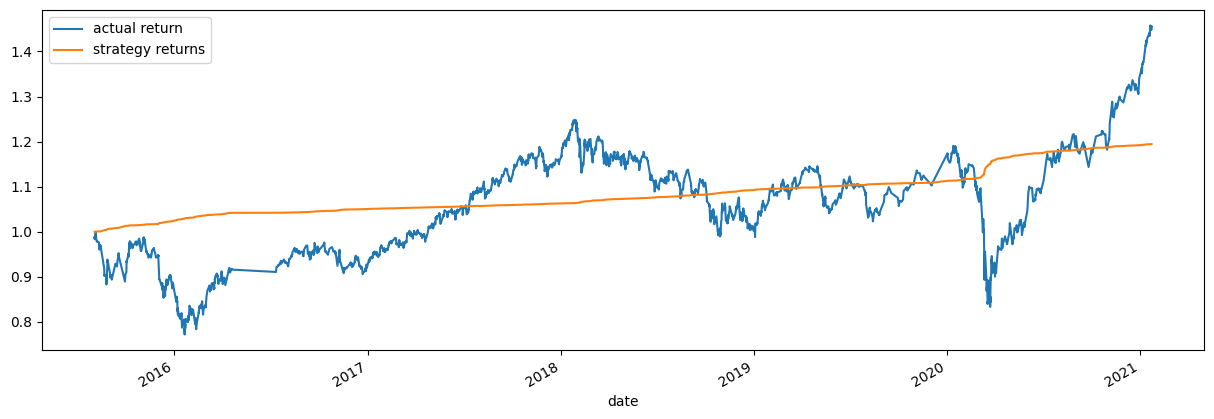

In [42]:
(1 + prediction_df[['actual return', 'strategy returns']]).cumprod().plot(figsize = (15,5))


In [43]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='sgd', 
                    alpha=1e-5,
#                    max_iter=1000,
                    hidden_layer_sizes=(8, 4),
                    random_state=42
                    )

In [44]:
MLP_model = clf.fit(X_train_scaled, y_train)

MLP_pred = MLP_model.predict(X_test_scaled)

MLP_pred 

c:\Users\Rania\anaconda3\envs\mlops\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([1., 1., 1., ..., 1., 1., 1.])

In [45]:
MLP_testing_report = classification_report(y_test, MLP_pred)

print(MLP_testing_report)

              precision    recall  f1-score   support

        -1.0       0.53      0.01      0.02      1779
         1.0       0.56      0.99      0.72      2270

    accuracy                           0.56      4049
   macro avg       0.54      0.50      0.37      4049
weighted avg       0.55      0.56      0.41      4049



In [47]:
MLP_predictions_df = pd.DataFrame(index = x_test.index)

MLP_predictions_df['Predicted'] = MLP_pred

MLP_predictions_df['Actual Returns'] = signals_df['actual returns']

MLP_predictions_df['Strategy Returns'] = MLP_predictions_df['Actual Returns'] * MLP_predictions_df['Predicted']

display(MLP_predictions_df.head())
display(MLP_predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
date,,,
2015-08-03 09:30:00,1.0,-0.013925,-0.013925
2015-08-03 10:15:00,1.0,-0.002648,-0.002648
2015-08-03 10:30:00,1.0,0.002212,0.002212
2015-08-03 10:45:00,1.0,0.000883,0.000883
2015-08-03 11:00:00,1.0,0.000441,0.000441


,Predicted,Actual Returns,Strategy Returns
date,,,
2021-01-22 09:30:00,1.0,-0.006866,-0.006866
2021-01-22 11:30:00,1.0,0.002405,0.002405
2021-01-22 13:45:00,1.0,0.002099,0.002099
2021-01-22 14:30:00,1.0,0.001496,0.001496
2021-01-22 15:45:00,1.0,-0.000896,-0.000896


<Axes: xlabel='date'>

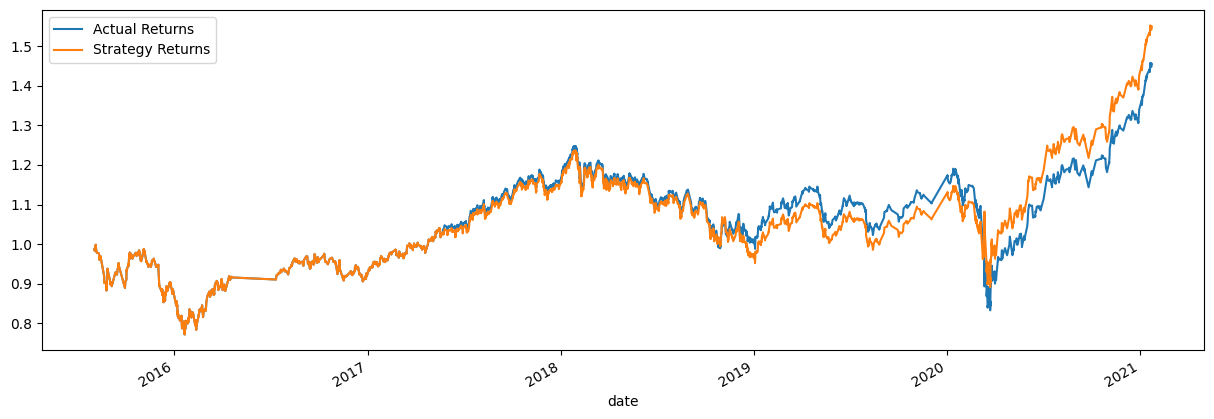

In [48]:
(1 + MLP_predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot(figsize = (15,5))
